### **Clone Fasttext Repo on Github**

In [2]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3826, done.
remote: Total 3826 (delta 0), reused 0 (delta 0), pack-reused 3826
Receiving objects: 100% (3826/3826), 8.20 MiB | 5.60 MiB/s, done.
Resolving deltas: 100% (2409/2409), done.


In [3]:
cd fastText

/content/fastText


In [4]:
!make

c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/quantmatrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/vector.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/model.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/utils.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -

### **Google Drive API**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### **Import Library**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Model Training**

In [0]:
# from gensim.corpora import WikiCorpus

# dataset = WikiCorpus('/content/drive/My Drive/idwiki-latest-pages-articles.xml.bz2', lemmatize=False, dictionary={})

In [0]:
# start_time = time.time()

# with open("wiki-id-formatted.txt", 'w', encoding="utf8") as output:
#   counter = 0
#     for text in dataset.get_texts():
#       output.write(' '.join(text)+"\n")
#       counter = counter + 1
#       if counter > 100000: # Hanya mengambil 100,000 artikel pertama
#         break

# print('-- %s seconds --' %(time.time() - start_time))

In [0]:
# wiki_model = fasttext.train_unsupervised('wiki-id-formatted.txt', model='skipgram')

# print("--- %s seconds ---" % (time.time() - start_time))

In [0]:
# train = '/content/drive/My Drive/Tugas_Akhir/dataset/train.txt'
# test  = '/content/drive/My Drive/Tugas_Akhir/dataset/test.txt'
# wiki  = '/content/drive/My Drive/Tugas_Akhir/dataset/wiki-id-formatted.txt'

In [0]:
# start_time = time.time()

# !./fasttext skipgram -input wiki -output wiki_model

# print("--- %s seconds ---" % (time.time() - start_time))

In [46]:
!./fasttext supervised -input ../fastText/train.txt -output ft_model -label _label_ -dim 300 -lr 1.0 -lrUpdateRate 200 -epoch 50 -loss hs -ws 10

Read 0M words
Number of words:  6522
Number of labels: 3
Progress: 100.0% words/sec/thread:  277815 lr:  0.000000 avg.loss:  0.147985 ETA:   0h 0m 0s


### **Model Predict**

In [0]:
# !./fasttext ../fastText/model2.vec

# !./fasttext print-word-vectors model.bin < ../fastText/test.txt

# !./fasttext nn model.bin

# y_pred_prob = !./fasttext predict-prob model.bin ../valid.txt

# y_pred = !./fasttext predict ../fastText/model2.bin ../test.txt

In [0]:
y_pred = !./fasttext predict ft_model.bin ../fastText/test.txt

In [0]:
train = pd.read_excel('/content/drive/My Drive/Tugas_Akhir/dataset/train.xlsx', index_col=0)
test  = pd.read_excel('/content/drive/My Drive/Tugas_Akhir/dataset/test.xlsx', index_col=0)

In [50]:
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2900 non-null   object
 1   label   2900 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.4+ KB


In [51]:
test.dropna(inplace=True)
test.reset_index(drop=True, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    729 non-null    object
 1   label   729 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.5+ KB


In [0]:
y_test = '_label_' + test['label'].astype(str)

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[189,  20,  18],
       [ 32, 223,  37],
       [ 18,  10, 182]])

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8148148148148148

In [0]:
y_pred_list = []

for i in range(len(y_pred)):
  y_pred_list.append(y_pred[i])


In [0]:
y_pred_series = pd.Series(y_pred_list)

In [57]:
len(y_pred_series)

729

**Concat Series**


In [0]:
data = pd.concat([test, y_pred_series], axis=1)

In [40]:
data.head(100)

,text,label,0
0,kali masyarakat nusantara dampak wabah sakit l...,-1,_label_-1
1,mas th bangsa indonesia hny pintu gerbang merd...,0,_label_0
2,nemu orang paruh baya alami ganggu mental tida...,1,_label_1
3,bosan kyk,-1,_label_-1
4,program stimulus tidak implementasi khawatir m...,-1,_label_-1
...,...,...,...
95,pasuk indonesia overthinking,0,_label_0
96,pake duhh harap poin emang dah dapet poin fifa...,-1,_label_0
97,kali ngirim lamar kerja hilihh,0,_label_0
98,tebak lokesyen,0,_label_0


In [0]:
# from google.colab import files

# data.to_excel('hasil_fasttext.xlsx') 
# files.download('hasil_fasttext.xlsx')

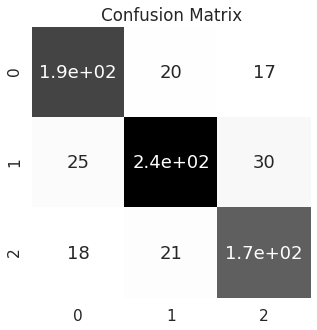

In [21]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(5,5))
sn.set(font_scale=1.4) # for label size

sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cbar=False, cmap='Greys').set_title('Confusion Matrix') # font size

plt.show()

**Keras CNN with FastText Embeddings**

In [0]:
y_train = train['label'].tolist()

In [58]:
import os, re, csv, math, codecs
from tqdm import tqdm

print('loading word embeddings...')

embeddings_index = {}

f = codecs.open('ft_model.vec', encoding='utf-8')

for line in tqdm(f):
  values = line.rstrip().rsplit(' ')
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs

f.close()

print('Found %s word vectors' %len(embeddings_index))

1771it [00:00, 8989.95it/s]

loading word embeddings...


6523it [00:00, 8562.97it/s]

Found 6523 word vectors


In [59]:
print('num train : ', train.shape[0])
print('num test  : ', test.shape[0])

num train :  2900
num test  :  729


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

label_names = ['positive', 'neutral','negative']

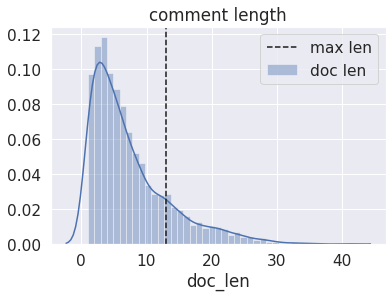

In [61]:
train['doc_len'] = train['text'].apply(lambda words: len(words.split(' ')))

max_seq_len = np.round(train['doc_len'].mean() + train['doc_len'].std()).astype(int)

sns.distplot(train['doc_len'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('comment length')
plt.legend()
plt.show()

In [0]:
import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.utils import plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

In [63]:
raw_docs_train = train['text'].tolist()
raw_docs_test  = test['text'].tolist()

MAX_NB_WORDS = 100000
num_classes = len(label_names)

print('tokenizing input data...')

tokenizer = Tokenizer(num_words=MAX_NB_WORDS,
                      lower=True,
                      char_level=False)
tokenizer.fit_on_texts(raw_docs_train + raw_docs_test)

word_seq_train = tokenizer.texts_to_sequences(raw_docs_train)
word_seq_test  = tokenizer.texts_to_sequences(raw_docs_test)

word_index = tokenizer.word_index

print('dictionary size: ', len(word_index))

word_seq_train = sequence.pad_sequences(word_seq_train, maxlen = max_seq_len)
word_seq_test  = sequence.pad_sequences(word_seq_test, maxlen = max_seq_len)




tokenizing input data...
dictionary size:  7567


In [0]:
batch_size = 256
num_epochs = 8

num_filters = 64
embed_dim   = 300
weight_decay = 1e-4

In [65]:
print('preparing embedding matrix...')

words_not_found = []

nb_words = min(MAX_NB_WORDS, len(word_index))

embedding_matrix = np.zeros((nb_words, embed_dim))

for word, i in word_index.items():
  if i >= nb_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if (embedding_vector is not None) and len(embedding_vector) > 0:
    embedding_matrix[i] = embedding_vector
  else:
    words_not_found.append(word)

print('number of null word embeddings: %d' %np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 1046


In [66]:
print('sample words not found: ', np.random.choice(words_not_found, 10))

sample words not found:  ['pelit' 'y' 'menkeunya' 'ayan' 'sikh' 'iluminati' 'ziyadatul' 'endang'
 'hempas' 'asi']


In [211]:
print('training CNN ... ')

model = Sequential()
model.add(Embedding(nb_words, embed_dim,
                    weights=[embedding_matrix],
                    input_length=max_seq_len,
                    trainable=False))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(num_classes, activation='softmax'))

adam = optimizers.Adam(lr = 0.001,
                      beta_1 = 0.9,
                      beta_2 = 0.999,
                      epsilon=1e-08,
                      decay=0.0)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

training CNN ... 
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 13, 300)           2270100   
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 13, 64)            134464    
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 6, 64)             0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 64)             28736     
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 64)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 

In [0]:
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.01,
                               patience=3,
                               verbose=1)

callbacks_list = [early_stopping]

In [0]:
categorical = []

for i in train['label']:
  if i == -1:
    categorical.append(0)
  elif i == 0:
    categorical.append(1)
  elif i == 1:
    categorical.append(2)

train['categorical'] = categorical

In [0]:
categorical = []

for i in test['label']:
  if i == -1:
    categorical.append(0)
  elif i == 0:
    categorical.append(1)
  elif i == 1:
    categorical.append(2)

test['categorical'] = categorical

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train['categorical'])

In [216]:
print(train_labels)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [0]:
y_test = to_categorical(test['categorical'])

In [218]:
hist = model.fit(word_seq_train,
                 train_labels,
                 batch_size = batch_size,
                 epochs = num_epochs,
                 validation_split=0.1,
                 shuffle=True,
                 verbose=2)

Train on 2610 samples, validate on 290 samples
Epoch 1/8
 - 1s - loss: 0.7689 - accuracy: 0.7590 - val_loss: 0.3181 - val_accuracy: 0.9345
Epoch 2/8
 - 1s - loss: 0.2205 - accuracy: 0.9605 - val_loss: 0.2817 - val_accuracy: 0.9345
Epoch 3/8
 - 1s - loss: 0.1409 - accuracy: 0.9716 - val_loss: 0.3000 - val_accuracy: 0.9345
Epoch 4/8
 - 1s - loss: 0.0967 - accuracy: 0.9805 - val_loss: 0.2921 - val_accuracy: 0.9310
Epoch 5/8
 - 1s - loss: 0.0846 - accuracy: 0.9816 - val_loss: 0.2989 - val_accuracy: 0.9345
Epoch 6/8
 - 1s - loss: 0.0786 - accuracy: 0.9816 - val_loss: 0.2696 - val_accuracy: 0.9448
Epoch 7/8
 - 1s - loss: 0.0718 - accuracy: 0.9812 - val_loss: 0.2580 - val_accuracy: 0.9517
Epoch 8/8
 - 1s - loss: 0.0596 - accuracy: 0.9881 - val_loss: 0.2687 - val_accuracy: 0.9414


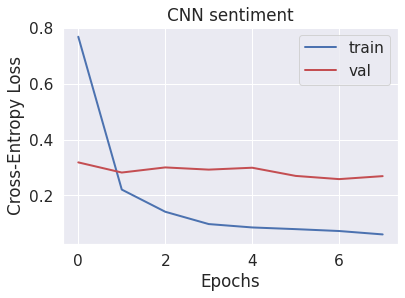

In [219]:
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

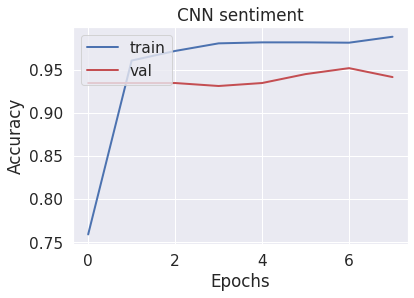

In [220]:
plt.figure()
plt.plot(hist.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()